<a href="https://colab.research.google.com/github/Xodarap/notebooks/blob/main/longtermist_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create a lognormal distribution. Observe that it fits the Claire/Owen numbers fairly well.

In [2]:
import numpy as np
from scipy import stats
from scipy.stats import lognorm
import pandas as pd

oversample_factor = 100
r = lognorm.rvs(1.3, size = 2000 * oversample_factor)
r.sort()
ft = lambda f,t: np.mean(r[-f * oversample_factor:-t * oversample_factor])
df = pd.DataFrame([[25, ft(40,1)], [7.7, ft(170, 41)], [2.3, ft(600, 171)], [0.7, ft(2000, 601)]], columns = ['Claire/Owen', 'Fitted'])
df

,Claire/Owen,Fitted
0,25.0,24.618116
1,7.7,8.742372
2,2.3,3.357859
3,0.7,0.728685


In [3]:
baseline = lognorm.ppf(1 - 242 / 2000, 1.3)
baseline = 0.375
baseline

0.375

In [4]:
values = pd.DataFrame([[v, v * baseline, v * baseline * 25] for v in [675, 775, 875]], 
                      columns = ['Multiplier', 'Implied annual value', 'Implied lifetime value'])
values

,Multiplier,Implied annual value,Implied lifetime value
0,675,253.125,6328.125
1,775,290.625,7265.625
2,875,328.125,8203.125


In [7]:
baseline*200

75.0

In [8]:
lifetime_value=7.5* 32 * 242 
lifetime_value

58080.0

In [6]:
t = lambda threshold: len([v for v in r if v > baseline * threshold]) / oversample_factor
multiples = pd.DataFrame([[1, t(1), 242], 
                          [5, t(5), .99*242],
                          [10, t(10), .95*242],
                          [15, t(15), .8*242],
                          ], 
                      columns = ['Multiplier', 'Predicted number > multiplier', 'Actual number > multiplier (approx)'])
multiples

,Multiplier,Predicted number > multiplier,Actual number > multiplier (approx)
0,1,1549.01,242.00
1,5,631.29,239.58
2,10,310.26,229.90
3,15,183.99,193.60


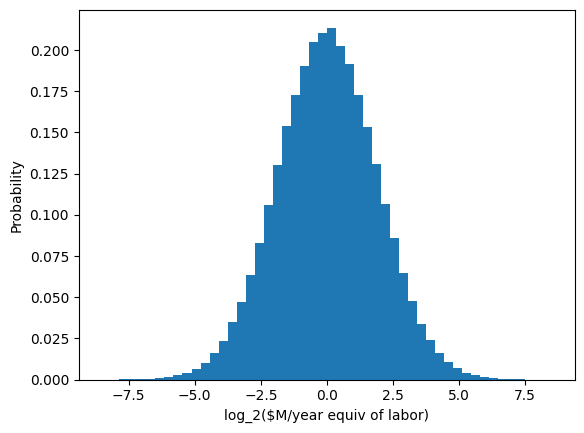

In [16]:
import matplotlib.pyplot as plt

plt.hist(np.log2(r), bins=50, density=True) 
plt.xlabel('log_2($M/year equiv of labor)')
plt.ylabel('Probability')
# plt.title('Histogram of Lognormal Data (Log Scale)')
plt.show()

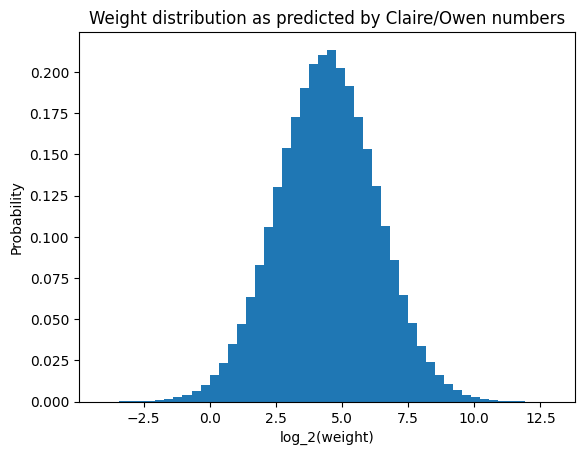

In [25]:
normalized = r * (7 / .325)
plt.hist(np.log2(normalized), bins=50, density=True) 
plt.xlabel('log_2(weight)')
plt.ylabel('Probability')
plt.title('Weight distribution as predicted by Claire/Owen numbers')
plt.show()

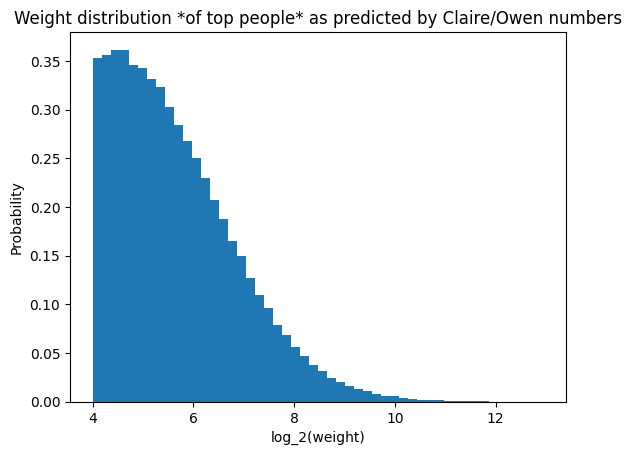

In [26]:
truncated = [v for v in normalized if v > 2**4]
plt.hist(np.log2(truncated), bins=50, density=True) 
plt.xlabel('log_2(weight)')
plt.ylabel('Probability')
plt.title('Weight distribution *of top people* as predicted by Claire/Owen numbers')
plt.show()